In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('shot_logs.csv')

In [3]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


(array([6.1343e+04, 5.3316e+04, 9.8070e+03, 2.3450e+03, 8.7900e+02,
        2.5900e+02, 5.3000e+01, 1.7000e+01, 1.4000e+01, 9.0000e+00,
        6.0000e+00, 3.0000e+00, 7.0000e+00, 6.0000e+00, 5.0000e+00]),
 array([ 0.        ,  3.54666667,  7.09333333, 10.64      , 14.18666667,
        17.73333333, 21.28      , 24.82666667, 28.37333333, 31.92      ,
        35.46666667, 39.01333333, 42.56      , 46.10666667, 49.65333333,
        53.2       ]),
 <a list of 15 Patch objects>)

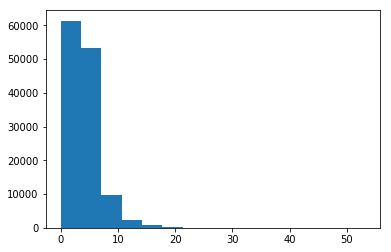

In [148]:
plt.hist(df['CLOSE_DEF_DIST'],  bins=15)

(array([7.7410e+03, 1.6419e+04, 1.4219e+04, 9.6300e+03, 6.8030e+03,
        4.6060e+03, 3.7980e+03, 4.1620e+03, 5.2870e+03, 7.5370e+03,
        8.4020e+03, 8.2380e+03, 1.5323e+04, 1.3037e+04, 1.9200e+03,
        3.9600e+02, 1.6500e+02, 9.0000e+01, 7.4000e+01, 5.3000e+01,
        4.6000e+01, 5.2000e+01, 4.5000e+01, 2.0000e+01, 6.0000e+00]),
 array([ 0.   ,  1.888,  3.776,  5.664,  7.552,  9.44 , 11.328, 13.216,
        15.104, 16.992, 18.88 , 20.768, 22.656, 24.544, 26.432, 28.32 ,
        30.208, 32.096, 33.984, 35.872, 37.76 , 39.648, 41.536, 43.424,
        45.312, 47.2  ]),
 <a list of 25 Patch objects>)

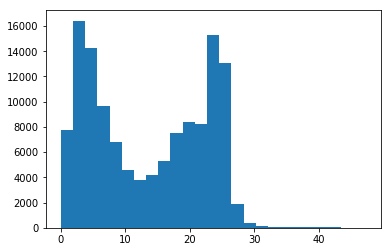

In [111]:
plt.hist(df['SHOT_DIST'],  bins=25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

In [29]:
klay_test = df[df['player_name'] == 'klay thompson']

In [167]:
class Player:
    
    def __init__(self, player_name):
        '''Constructor that takes a players name as input'''
        self.player_name = player_name
        self.data = df[df['player_name'] == self.player_name]
    
    
    def get_fg_pct(self):
        '''Returns the players field goal percentage'''
        df = self.data
        return round(
            (df[df['SHOT_RESULT'] == 'made']['SHOT_RESULT'].count() / \
                df['SHOT_RESULT'].count()) * 100, 
            2)
    
    
    def get_3fg_pct(self):
        '''Returns the players 3-point field goal percentage'''
        df = self.data
        return round(
            df[(df['SHOT_RESULT'] == 'made') & 
               (df['PTS_TYPE'] == 3)]['PTS'].count() / \
            df[df['PTS_TYPE'] == 3].count()['PTS'] * 100, 
            2)
    
    
    def splits_by_shot_distance(self):
        '''Returns a players shooting splits based on the shot distance from the basket'''
        df = self.data
        zerotosix = round(
            df[(df['SHOT_RESULT'] == 'made') & 
               (df['SHOT_DIST'] <= 6)]['PTS'].count() / \
            df[df['SHOT_DIST'] <= 6].count()['PTS'] * 100, 
            2)
        
        # discrepancy due to the short corner
        
        sixto22 = round(
            df[(df['SHOT_RESULT'] == 'made') & 
               (df['SHOT_DIST'] > 6) & 
               (df['SHOT_DIST'] <= 22.5)]['PTS'].count() / \
            df[(df['SHOT_DIST'] > 6) & 
               (df['SHOT_DIST'] <= 22.5)].count()['PTS'] * 100, 
            2)
        
        twentytwoandbeyond = round(
            df[(df['SHOT_RESULT'] == 'made') & 
                 (df['SHOT_DIST'] > 22.5)]['PTS'].count() / \
            df[df['SHOT_DIST'] >= 22.5].count()['PTS'] * 100, 
           2)
        return zerotosix, sixto22, twentytwoandbeyond
    
    
    def splits_by_def_distance(self):
        '''Returns shooting splits based on defender distance from the player'''
        df = self.data
        
        zeroto3 = round(
            df[(df['SHOT_RESULT'] == 'made') &
               (df['CLOSE_DEF_DIST'] <=3)].count()['PTS'] / \
            df[df['CLOSE_DEF_DIST'] <= 3].count()['PTS'] * 100, 
            2)
        
        threeto7 = round(
            df[(df['SHOT_RESULT'] == 'made') &
               (df['CLOSE_DEF_DIST'] > 3) &
               (df['CLOSE_DEF_DIST'] <= 7)].count()['PTS'] / \
            df[(df['CLOSE_DEF_DIST'] > 3) &
                (df['CLOSE_DEF_DIST'] <= 7)].count()['PTS'] * 100, 
            2)
        
        sevento11 = round(
            df[(df['SHOT_RESULT'] == 'made') &
               (df['CLOSE_DEF_DIST'] > 7) &
               (df['CLOSE_DEF_DIST'] <= 11)].count()['PTS'] / \
            df[(df['CLOSE_DEF_DIST'] > 7) &
                (df['CLOSE_DEF_DIST'] <= 11)].count()['PTS'] * 100, 
            2)
        
        elevenandbeyond = round(
            df[(df['SHOT_RESULT'] == 'made') &
               (df['CLOSE_DEF_DIST'] > 11)].count()['PTS'] / \
            df[df['CLOSE_DEF_DIST'] > 11 3].count()['PTS'] * 100, 
            2)
        
        return zeroto3, threeto7, sevento11
    
    def spilts_by_period(self):
        df = self.data
        

In [168]:
klay = Player('klay thompson')

In [144]:
klay.get_fg_pct()

46.24

In [145]:
klay.get_3fg_pct()

43.49

In [146]:
klay.splits_by_shot_distance()

(60.43, 41.86, 43.28)

In [169]:
klay.splits_by_def_distance()

(45.35, 46.68, 48.33)